## Kalman Filtering


In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter

### Definition of forward model

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators



In [2]:
grid = Simulator.Grid(nx=30,ny=20,dx=0.1,dy=0.1)
simulator = Simulator.Simulator(grid, D=0.25, v=[1,0])

### Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
import numpy as np
from random import random

def prior(grid, phi):
    """
    Constructing a Matern-type covariance prior with Matern-parameter phi
    where the matrix is normalized with the standard deviation
    """
    # INPUT! Bell mean
    mean = 0.5*np.arange(3,9,0.01)
    # INPUT! Constant var
    var  = 0.5*np.arange(4,7,0.005) + random()

    # Matern covariance
    dist_mat = np.copy(grid.dist_mat)
    cov = (1+phi*dist_mat)*np.exp(-phi*dist_mat) 
    # Normalisation
    for i in range(grid.N_x):
        for j in range(grid.N_x):
            cov[i][j] = np.sqrt(var[i])*np.sqrt(var[j])*cov[i][j]
    
    return mean, cov

Please remember to set priors!


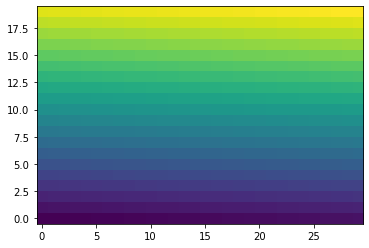

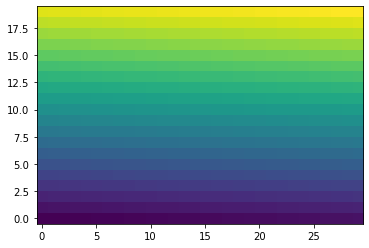

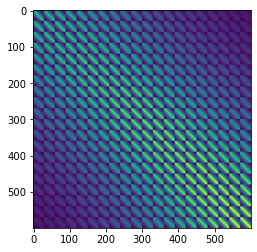

In [4]:
statistics = Statistics.Statistics(simulator)
mean, cov = prior(grid=grid, phi=2.0)
statistics.set(mean, cov)

from matplotlib import pyplot as plt
plt.imshow(np.reshape(mean, (20,30)), origin="lower")
plt.show()
plt.imshow(np.reshape(np.diag(cov), (20,30)), origin="lower")
plt.show()
plt.imshow(cov)
plt.show()

### Setting observation moorings

In [5]:
import numpy as np

def observation_positions(grid, freq=10):
    poses = []
    for j in range(int(np.floor(grid.ny/freq))):
        for i in range(int(np.floor(grid.nx/freq))):
            poses.append([i*freq,j*freq])
    return poses


In [6]:
observation = Observation.Observation(simulator)
observation.set_indices(np.array((170,1,200,340,400)))

Remember to set observation positions and to set values!


In [7]:
observation.obses = np.array((10,7,7,9,2))

### Serial filtering

()


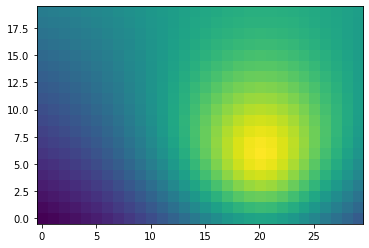

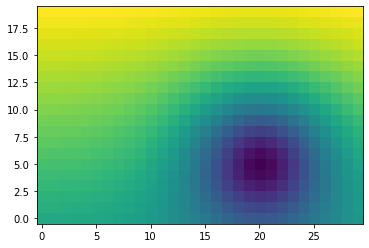

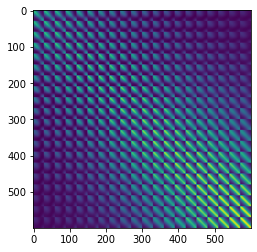

()


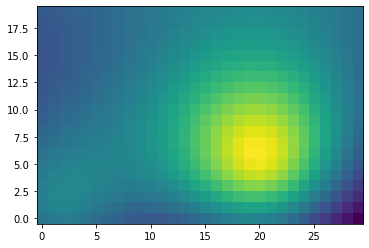

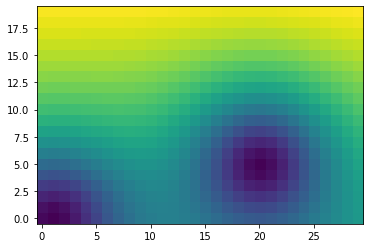

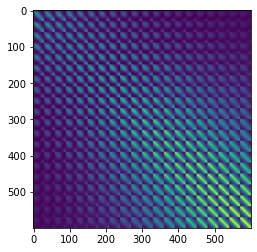

()


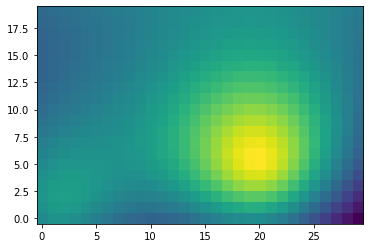

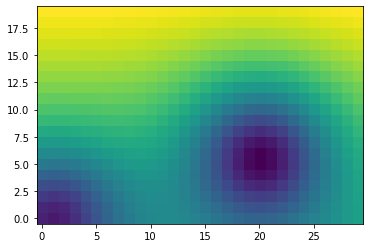

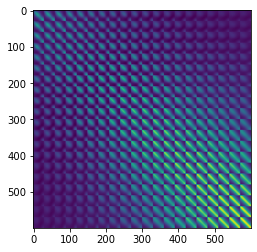

()


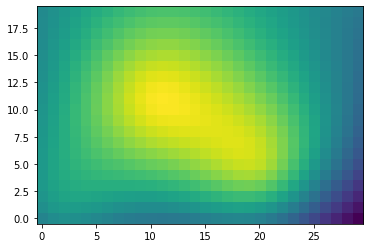

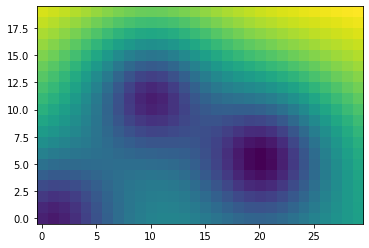

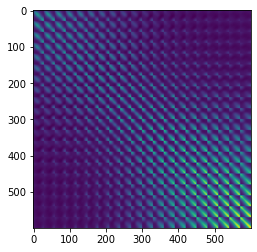

()


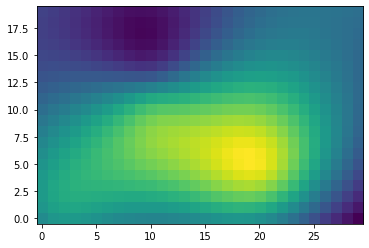

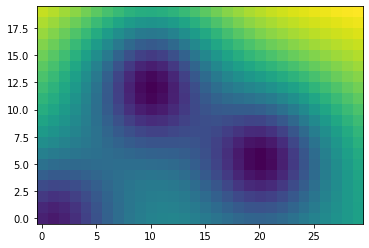

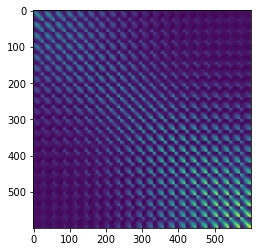

In [8]:
kalmanFilter = KalmanFilter.Kalman(statistics, observation)

for obs in range(observation.N_y):
    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[obs], obs)
    
    plt.imshow(np.reshape(statistics.mean, (20,30)), origin="lower")
    plt.show()
    plt.imshow(np.reshape(np.diag(statistics.cov), (20,30)), origin="lower")
    plt.show()
    plt.imshow(statistics.cov)
    plt.show()



### All-at-once Processing

In [9]:
mean, cov = prior(grid=grid, phi=2.0)
statistics.set(mean, cov)

In [10]:
kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses)

plt.imshow(np.reshape(statistics.mean, (20,30)), origin="lower")
plt.show()
plt.imshow(np.reshape(np.diag(statistics.cov), (20,30)), origin="lower")
plt.show()
plt.imshow(statistics.cov)
plt.show()

(array([5.45161093, 5.62098631, 5.68528934, 5.67281993, 5.61709798,
        5.54197975, 5.46395582, 5.39398025, 5.33893239, 5.30276728,
        5.28736906, 5.29309633, 5.31900682, 5.36277397, 5.42035292,
        5.48550999, 5.54940195, 5.60049536, 5.6252439 , 5.6099675 ,
        5.54395988, 5.42277077, 5.24971089, 5.03449564, 4.79007623,
        4.52958876, 4.26446842, 4.00370561, 3.75381818, 3.51915967,
        5.64292213, 5.81667428, 5.89764023, 5.90464656, 5.86815803,
        5.81198628, 5.75271352, 5.70125788, 5.66437348, 5.64591282,
        5.64780739, 5.67070668, 5.71421825, 5.77673396, 5.85489457,
        5.94281342, 6.03124901, 6.10703805, 6.15336111, 6.15178166,
        6.08684572, 5.95199757, 5.75256662, 5.50300117, 5.22111981,
        4.92359953, 4.62393617, 4.33208504, 4.05485098, 3.79649875,
        5.73753221, 5.9124563 , 6.01250863, 6.04859348, 6.04308198,
        6.01713948, 5.98661164, 5.96210292, 5.9501077 , 5.95428935,
        5.97661064, 6.01812206, 6.07925527, 6.15